[View in Colaboratory](https://colab.research.google.com/github/raahatg21/TensorBoard-Keras-GoogleColab/blob/master/TensorBoard_using_Colab.ipynb)

# MNIST Dataset: Using TensorBoard with Google Colab

**Classification done on MNIST Dataset. TensorBoard visualisation tool is used inside Google Colab to see live graphs of the model during training and many more things.99.25% Validation Accuracy. 99.36% Testing Accuracy.**

In [0]:
import numpy
import matplotlib.pyplot as plt

In [2]:
from keras import models
from keras import layers
from keras import Input
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import callbacks

Using TensorFlow backend.


TensorBoard is implemented in Colab using the library *tensorboardcolab*. 

In case you don't have it installed, use:


```
!pip install tensorflowboard
```



In [5]:
!pip install tensorboardcolab

  Running setup.py bdist_wheel for tensorboardcolab ... - done
  Stored in directory: /root/.cache/pip/wheels/ab/74/02/cda602d1dc28b2f12eab313c49b9bfa14d6371326bc2590e06
Successfully built tensorboardcolab


In [0]:
import tensorboardcolab

Now create and object *(tbc)* of the *TensorBoardColab* class. This will be passed as callback argument when training the model down below. It will also include the link to view TensorBoard.

In [7]:
tbc = tensorboardcolab.TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://ee8e1e75.ngrok.io


In [8]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [9]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [10]:
test_data.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [0]:
# Preprocessing of Data

train_data = train_data.reshape((60000, 28, 28, 1))
train_data = train_data.astype('float32')/255

test_data = test_data.reshape((10000, 28, 28, 1))
test_data = test_data.astype('float32')/255

In [12]:
train_data.shape, test_data.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
# Preprocessing the Labels

train_labels = to_categorical(train_labels, num_classes = 10)
test_labels = to_categorical(test_labels, num_classes = 10)

In [14]:
train_labels.shape, test_labels.shape

((60000, 10), (10000, 10))

In [0]:
# Validation Set Splitting (First 10,000 samples of Training Set)

val_data = train_data[:10000]
val_labels = train_labels[:10000]

train_data = train_data[10000:]
train_labels = train_labels[10000:]

In [16]:
train_data.shape, train_labels.shape, val_data.shape, val_labels.shape

((50000, 28, 28, 1), (50000, 10), (10000, 28, 28, 1), (10000, 10))

In [0]:
# Building the Model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation = 'softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
__________

In [0]:
# Compiling the Model

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])

Pass the *callbacks* argument as: *TensorBoardColabCall(tbc)*.


Note that *tbc* was the object declared earlier. Now while the model is still training, head over to the link and you should be able to see live visualisation of your model. You can also see the full flowchart of your model.


In [20]:
# Training

history = model.fit(train_data, train_labels, epochs = 20, batch_size = 128, validation_data = (val_data, val_labels), callbacks = [tensorboardcolab.TensorBoardColabCallback(tbc)], verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 149us/step - loss: 0.4230 - acc: 0.8634 - val_loss: 0.0964 - val_acc: 0.9707
Epoch 2/20
50000/50000 [==============================] - 6s 122us/step - loss: 0.1197 - acc: 0.9636 - val_loss: 0.0637 - val_acc: 0.9802
Epoch 3/20
50000/50000 [==============================] - 6s 122us/step - loss: 0.0828 - acc: 0.9752 - val_loss: 0.0485 - val_acc: 0.9856
Epoch 4/20
50000/50000 [==============================] - 6s 119us/step - loss: 0.0654 - acc: 0.9800 - val_loss: 0.0446 - val_acc: 0.9870
Epoch 5/20
50000/50000 [==============================] - 6s 122us/step - loss: 0.0574 - acc: 0.9820 - val_loss: 0.0416 - val_acc: 0.9873
Epoch 6/20
50000/50000 [==============================] - 6s 121us/step - loss: 0.0547 - acc: 0.9832 - val_loss: 0.0347 - val_acc: 0.9911
Epoch 7/20
50000/50000 [==============================] - 6s 121us/step - loss: 0.0481 - acc: 0.9853 - val_loss: 0.0371 - 

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

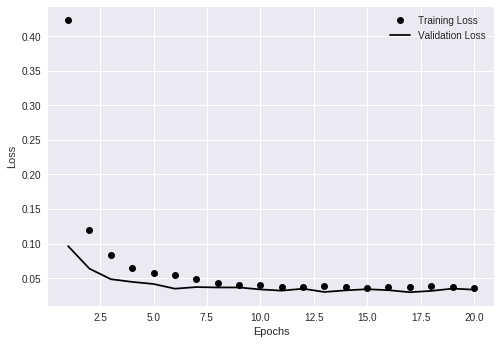

In [22]:
# Plotting Training and Validation Loss

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'ko', label = 'Training Loss')
plt.plot(epochs, val_loss, 'k', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

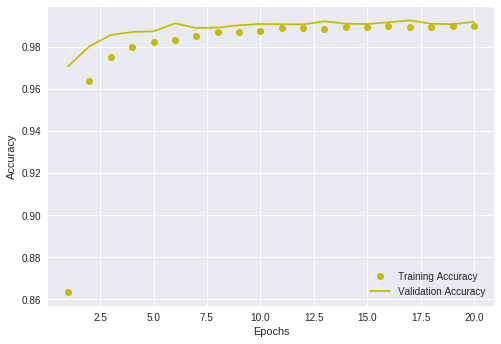

In [23]:
# Plotting Training and Validation Accuracy


plt.plot(epochs, acc, 'yo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'y', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Evaluating on Test Data

test_loss, test_acc = model.evaluate(test_data, test_labels)
test_loss, test_acc

10000/10000 [==============================] - 1s 104us/step


(0.02534027968061273, 0.9936)